In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import sklearn
import shap 
import time
import math
import sys 
import pathlib
import scipy

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [84]:
from scipy.stats import pearsonr

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os 
import sklearn
import shap 
import time
import math
import seaborn as sns
import pathlib
import statistics

In [85]:
font_size_plot = 26
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.labelweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['font.size'] = font_size_plot

path = os.path.abspath('')
os.chdir(f'{path}')

In [86]:
data = pd.read_csv('Supercapacitor V2.csv')
cap = data.pop('CAP')
data = pd.concat([data,cap],axis='columns')
data

,SA,DG,%N,%O,%S,%P,%B,CD,CONC,CAP
0,343.5,0.84,2.30,NaN,NaN,4.5,NaN,0.5,6.0,292.0
1,784.0,1.05,3.50,4.10,NaN,NaN,NaN,0.5,1.0,98.0
2,784.0,1.05,3.50,4.10,NaN,NaN,NaN,20.0,1.0,58.0
3,784.0,1.06,4.50,4.40,NaN,NaN,NaN,0.5,1.0,104.0
4,784.0,1.06,4.50,4.40,NaN,NaN,NaN,20.0,1.0,49.0
...,...,...,...,...,...,...,...,...,...,...
1084,571.0,NaN,9.50,11.81,NaN,NaN,NaN,1.0,6.0,239.0
1085,544.0,NaN,8.47,11.77,NaN,NaN,NaN,1.0,6.0,250.0
1086,373.0,NaN,6.36,15.91,NaN,NaN,NaN,1.0,6.0,193.0
1087,460.0,NaN,7.84,14.40,NaN,NaN,NaN,1.0,6.0,222.0


In [87]:
correlation_list = []
significance_list = []
for x_column in data:
    x_column_correlation_list = []
    x_column_significance_list = []
    for y_column in data:
        first_column = data[[x_column]].rename(columns={x_column:'x'})
        second_column = data[[y_column]].rename(columns={y_column:'y'})
        combined_data = pd.concat([first_column,second_column],axis='columns')
        combined_data = combined_data.dropna()
        print(x_column,y_column)
        r,p = pearsonr(combined_data['x'],combined_data['y'])
        print(r,p)
        x_column_correlation_list.append(r)
        x_column_significance_list.append(p)
    correlation_list.append(x_column_correlation_list)
    significance_list.append(x_column_significance_list)
correlation_data = pd.DataFrame(correlation_list,columns=data.columns)
significance_data = pd.DataFrame(significance_list,columns=data.columns)
correlation_data.index = data.columns
significance_data.index = data.columns
print(correlation_data)
print(significance_data)

SA SA
0.9999999999999994 0.0
SA DG
0.23129717774060948 7.790185349999695e-12
SA %N
-0.07072124963237647 0.05699804784430764
SA %O
-0.2571643418260632 1.07800658979796e-15
SA %S
-0.04732210095654541 0.4536181550355909
SA %P
-0.031375221450898244 0.6279165534618069
SA %B
0.07805234703202088 0.3375584010828991
SA CD
0.10811091886844272 0.00035151115874288303
SA CONC
-0.005855344030279674 0.8469541932363133
SA CAP
0.10151620312302213 0.0007940586166784446
DG SA
0.23129717774060948 7.790185349999695e-12
DG DG
0.9999999999999998 0.0
DG %N
-0.08127727581359956 0.04550166960478424
DG %O
0.03044412763172902 0.4150134897617084
DG %S
-0.01606116734146116 0.8089854104078275
DG %P
-0.10507846847961319 0.21998676838194883
DG %B
0.026133584676521715 0.7626476010428923
DG CD
0.11140569374338753 0.001110093458065989
DG CONC
0.06574848334605478 0.0547757831106162
DG CAP
-0.07603894619706549 0.026278554439029538
%N SA
-0.07072124963237647 0.05699804784430764
%N DG
-0.08127727581359956 0.04550166960478424

An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.


<Axes: >

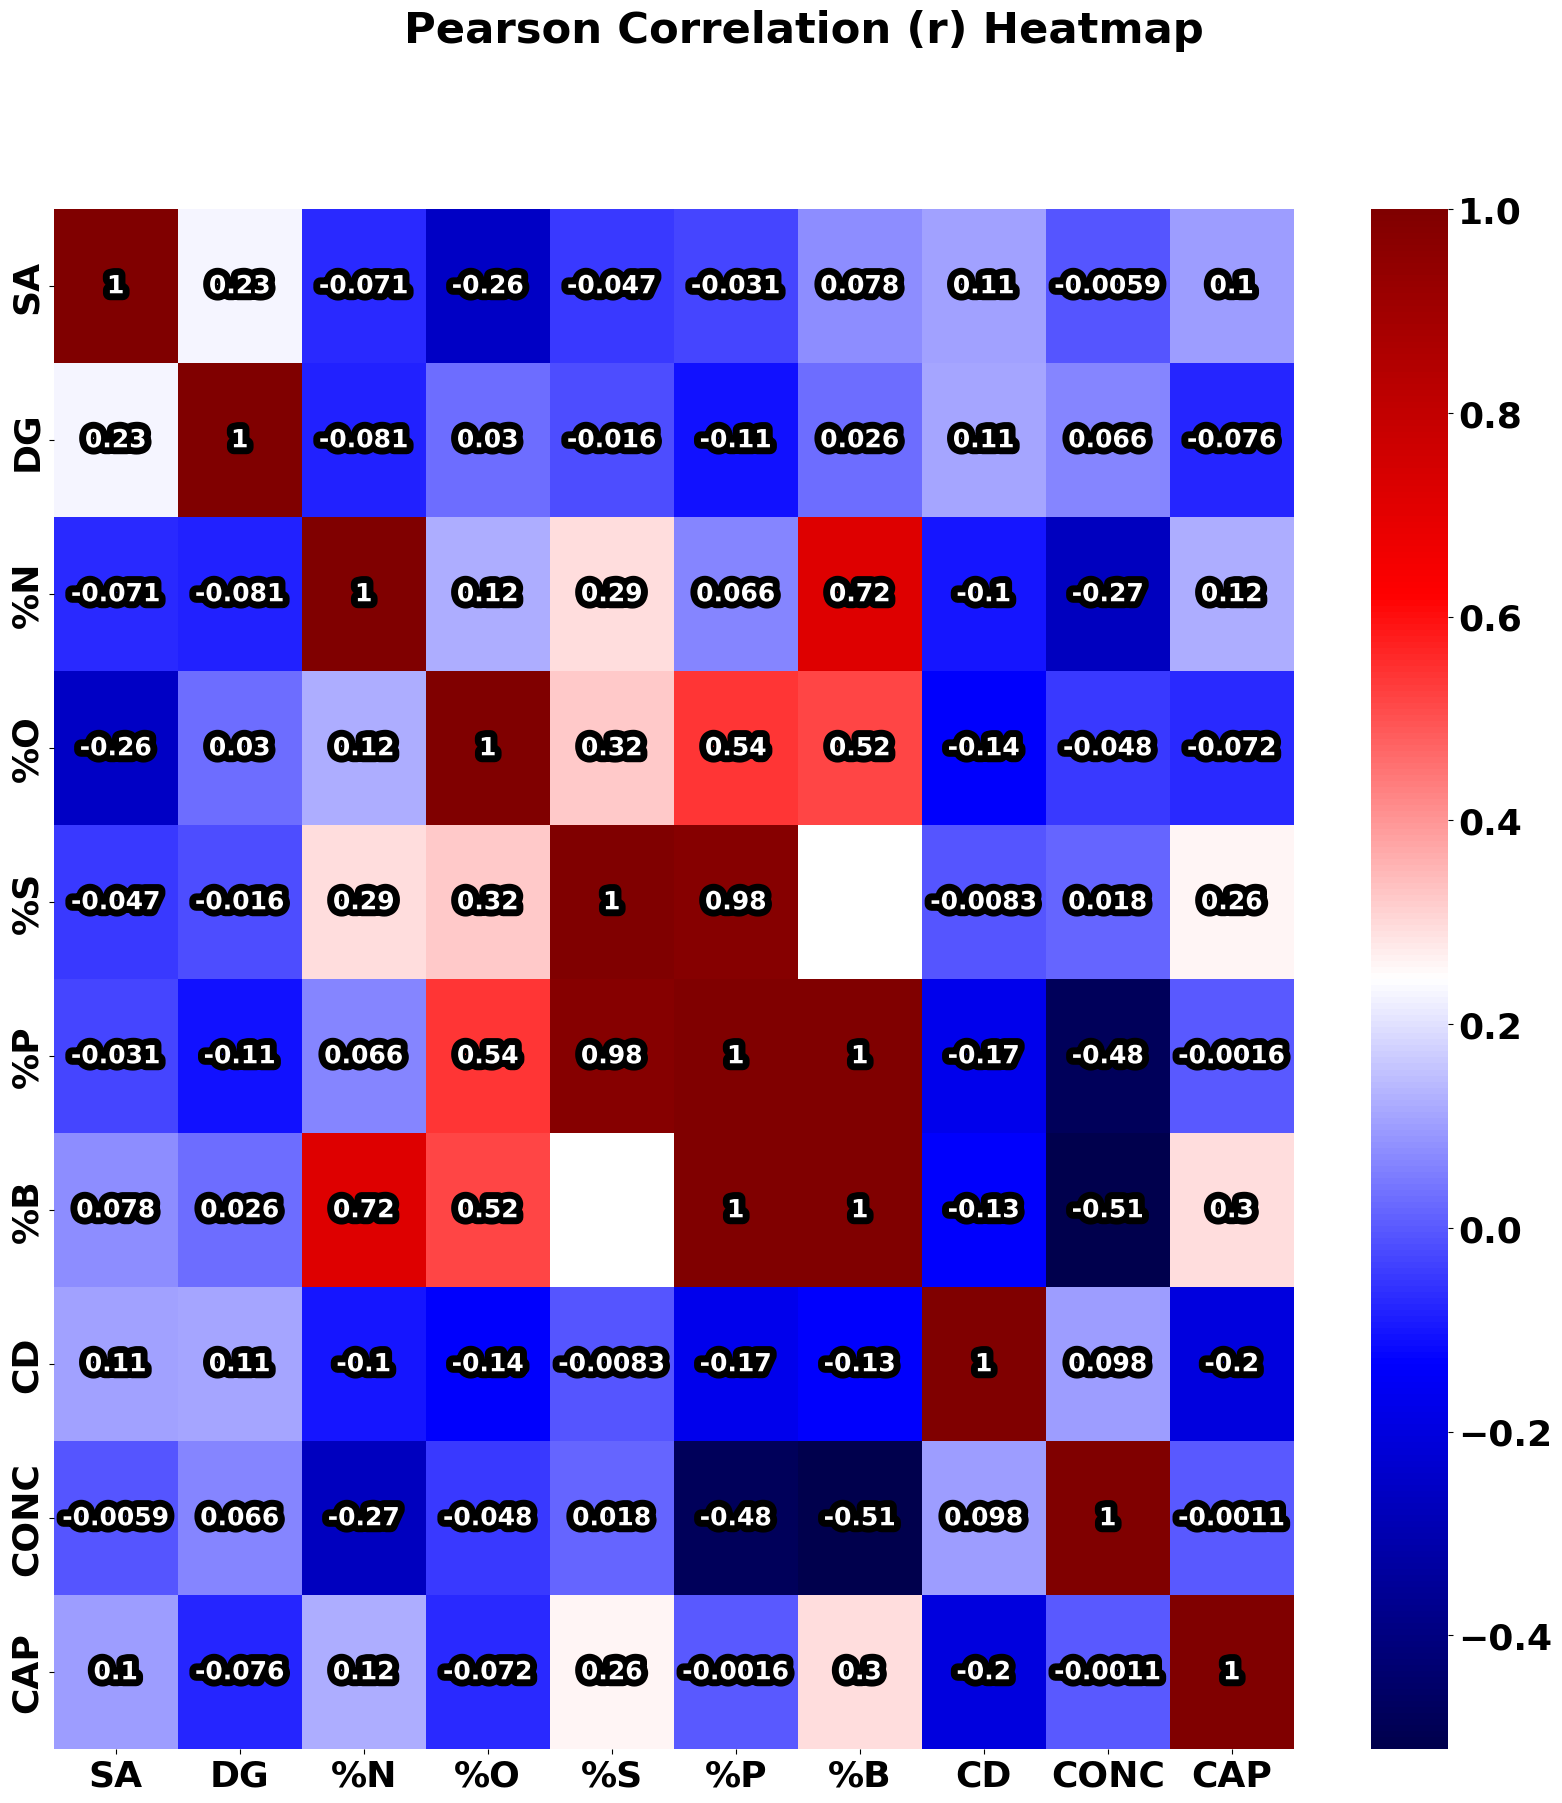

In [93]:
heatmap_fig = plt.figure(figsize=(20,20))
heatmap_ax = plt.subplot2grid((1,1),(0,0),fig=heatmap_fig)
heatmap_fig.suptitle('Pearson Correlation (r) Heatmap')

sns.heatmap(correlation_data,annot=True,ax=heatmap_ax,cmap='seismic',annot_kws={'fontsize':18,'path_effects':[matplotlib.patheffects.withStroke(linewidth=10, foreground='black')],'c':'white'})

<Axes: >

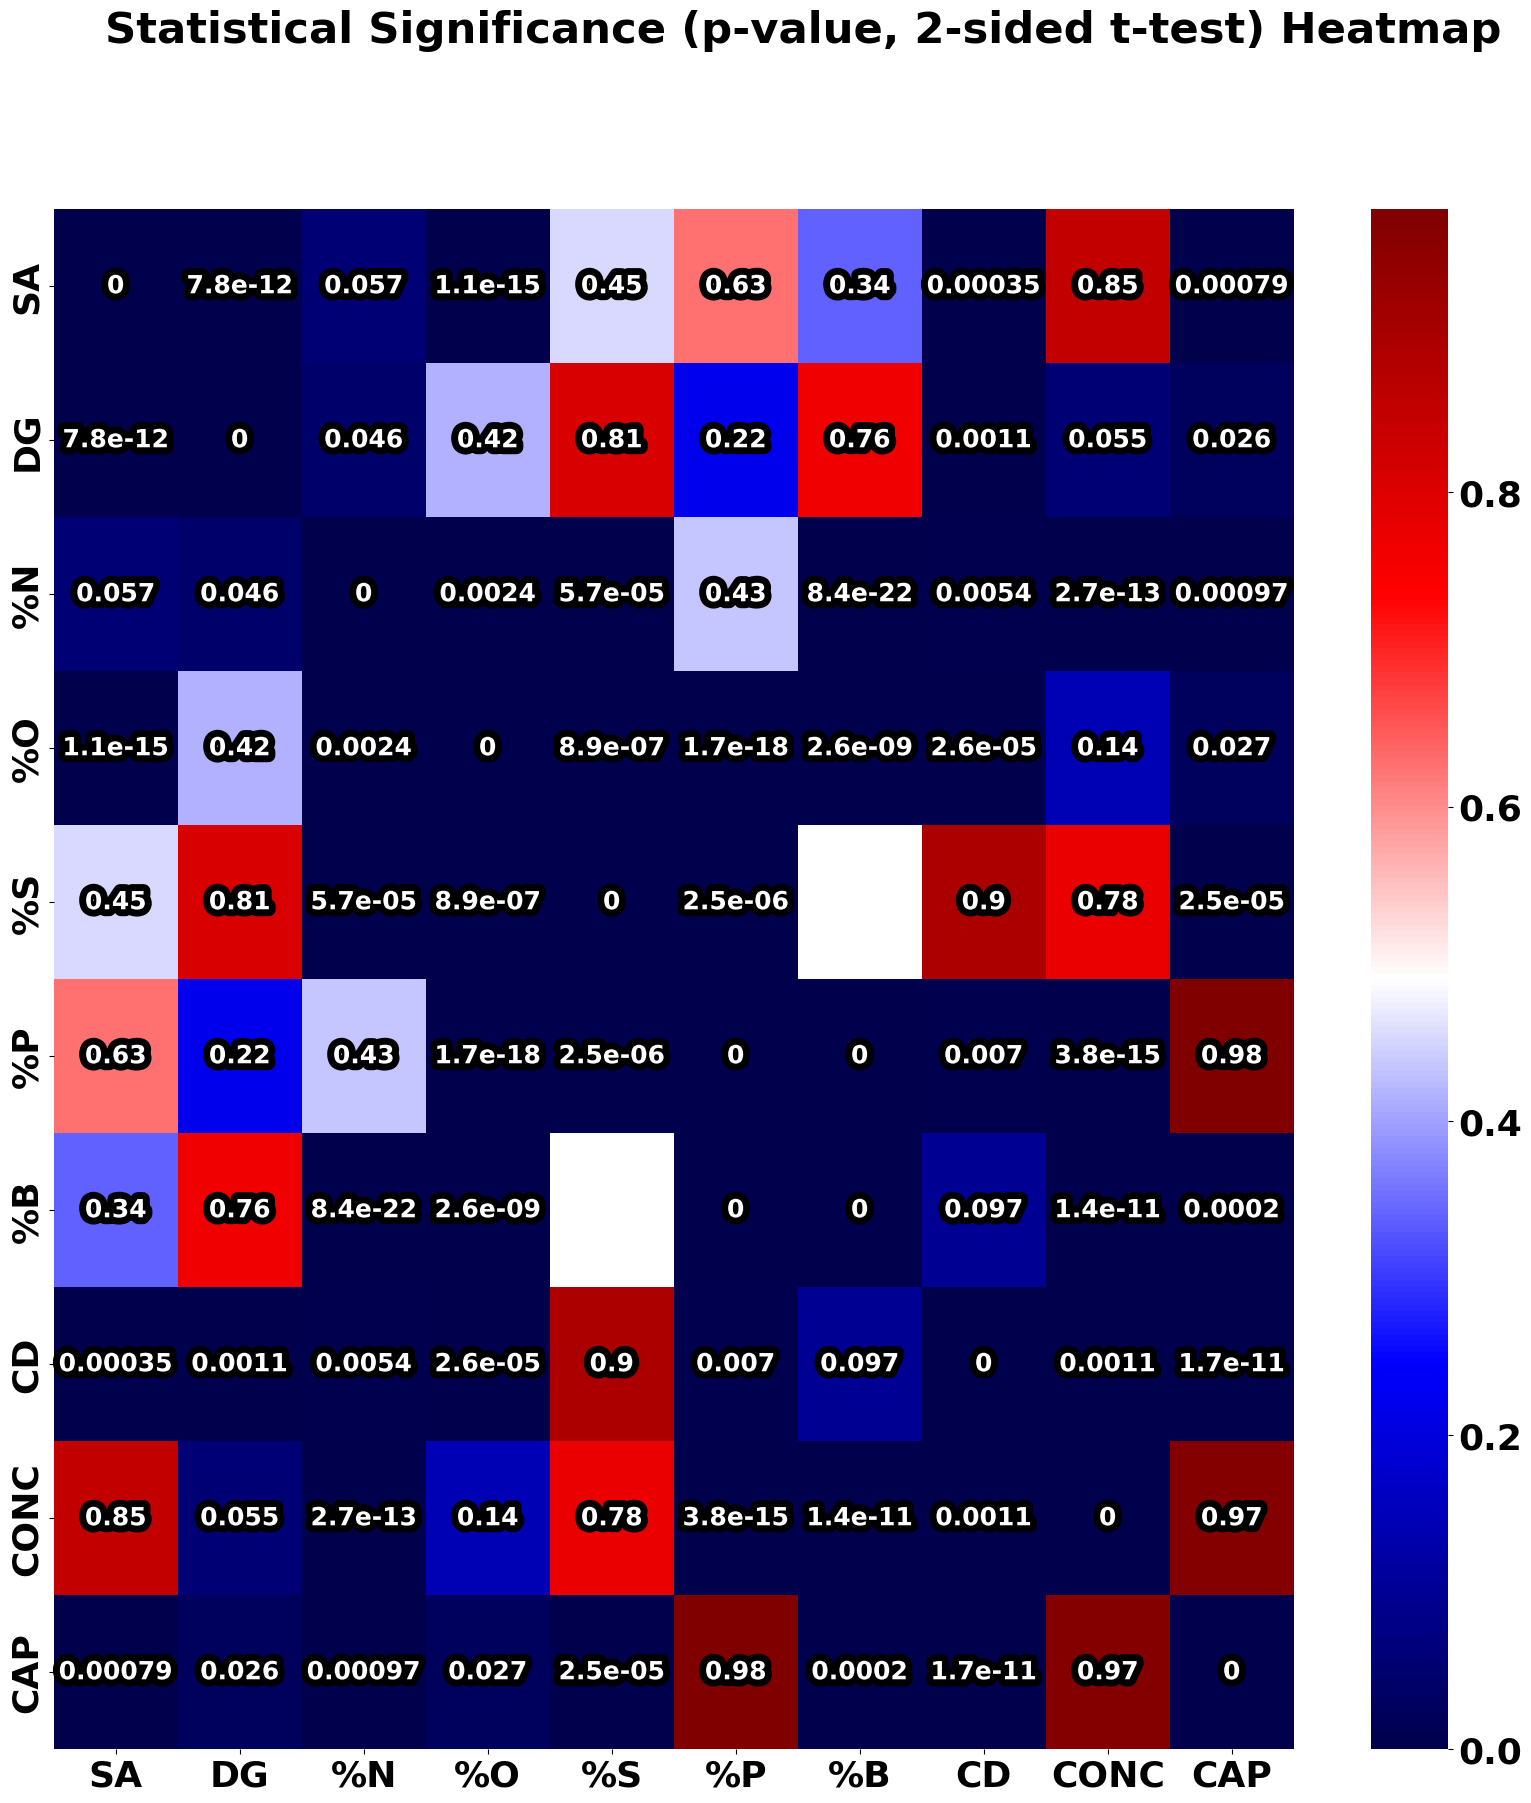

In [96]:
heatmap_fig = plt.figure(figsize=(20,20))
heatmap_ax = plt.subplot2grid((1,1),(0,0),fig=heatmap_fig)
heatmap_fig.suptitle('Statistical Significance (p-value, 2-sided t-test) Heatmap')

sns.heatmap(significance_data,annot=True,ax=heatmap_ax,cmap='seismic',annot_kws={'fontsize':18,'path_effects':[matplotlib.patheffects.withStroke(linewidth=10, foreground='black')],'c':'white'})